
## Resolución por SVM
**Integrantes**
> Mario Mallea, Maximiliano Ramírez, Hugo Rocha.

**Descripción**
> En este cuaderno resolveremos el problema de clasificación de cáncer via SVM.

**Herramientas**
> Python version 3.7.9; version 0.22.2 de scikit-learn

In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\mario\miniconda3\envs\mario\lib\site-packages
Requires: joblib, numpy, scipy
Required-by: shap, PDPbox, explainerdashboard, dtreeviz
Note: you may need to restart the kernel to use updated packages.


Liberías utilizadas:

In [23]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.decomposition import PCA

In [24]:
dataframe = load_breast_cancer()
df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],columns= np.append(dataframe['feature_names'], ['target']))

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Los datos con los que trabajeremos se conocen como *Wisconsin Breast Cancer Database* (WBCD, diagnostic) y corresponden a 569 muestras de tejido mamario reccogidas de pacientes reales usando la técnica FNA (fine needle aspiration), un tipo de biopsia ampliamente utilizada en el diagnóstico de condiciones como el cáncer. Pueden descargar el dataset desde Kaggle:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



Cada caso se encuentra descrito usando 30 atributos que describen propiedades del núcleo de las células observadas en la muestra: 


1.   Radius: distancia del centro al contorno estimada como un promedio de las distancias radiales a los puntos que describen el contorno.
2.   Texture: desviación estándar de las intensidades de pixel en la imagen.
3.   Perimeter: longitud del contorno/borde calculada como suma de las distancias entre los puntos que describen el contorno.
4.   Area: número de pixeles al interior del núcleo (+ 1/2 número total de pixeles de contorno)
5.   Smoothnes: Grado de variación (local) del radio.
6.   Compactness: Nivel de compactación medido como perímetro**2 / area - 1.0
7.   Concavity: Grado de concavidad del núcleo. Se estima tomando una cuerda entre los puntos del borde donde (más o menos) inicia una indentación (protuberancia desde el exterior hacia el interior) y se mide la distancia entre la cuerda y el borde.
8.   Concave Points: Número de porciones cóncavas en el contorno del núcleo. Un valor grande implica que existen muchas indentaciones y por lo tanto el núcleo luce rugoso.
9.   Symmetry: simetría. Primero se encuentra el eje correspondiente diámetro más largo. Luego se considera el diámetro perpendicular a ese eje y se calcula la diferencia entre el radio hacia la derecha y el radio a la izquierda.
10.  Fractal dimension: Dimensión fractal del núcleo estimada como sigue. Primero se mide el perímetro usando una barra o "metro" (que se va superponiendo al contorno) de longitud cada vez más grande. Luego se estima la pendiente de la curva que aparace al relacionar el largo del perímetro con el logaritmo del  "metro" usado para calcularlo.

Estas características se agregan entre las diferentes células tomando el promedio, la desviación estándar y el promedio de los 3 valores más grandes.

Además de los 30 atributos que se generan, se tiene un identificador de cada registro y la clase a la que pertenece cada registro:

*  Malign (cancer, 357 casos), Bening (no cancer, 212 casos).

El dataset no tiene datos faltantes y todos los atributos son numéricos.




**Distribución de tumores malignos(1) y benignos(0)**

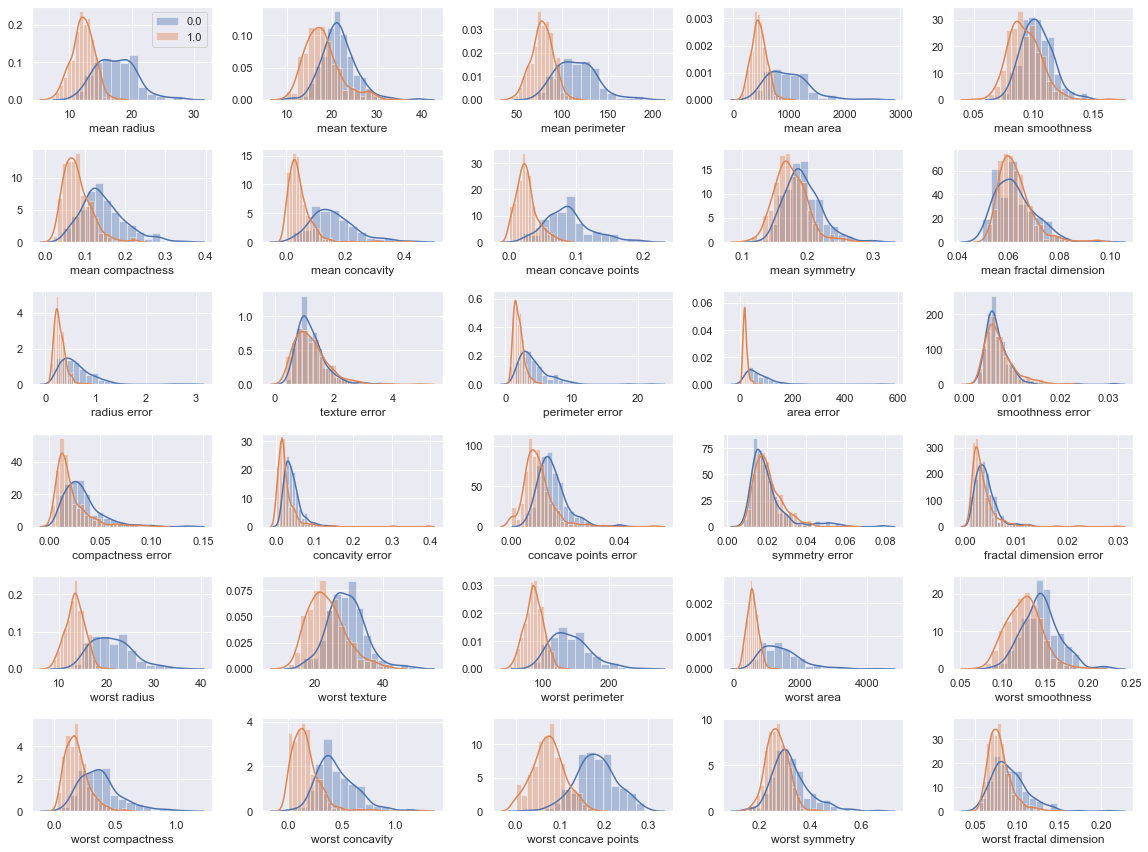

In [25]:
classes= df.target.unique()
df_all = pd.DataFrame(df)

data = load_breast_cancer()
X = data.data #569x30 matrix
y = data.target #array of 569 entries (class id)
df_all['class'] = y
fig, axes = plt.subplots(figsize=(16,12), nrows=6, ncols=5)
for i, column in enumerate(data.feature_names):
    for class_ in classes:
      target = df_all.loc[df_all['class'] == class_]
      sns.distplot(target[column], hist=True, rug=False, kde=True, ax=axes[i//5,i%5],label=class_)
      if i==0:
        axes[0,0].legend()
        

plt.tight_layout()
plt.show()


Al gráficar pares de atributos de las imagenes de la biopsia podemos observar que cada una de las características de las imagenes son representativas de la natualeza de la célula extraída del tumor. 

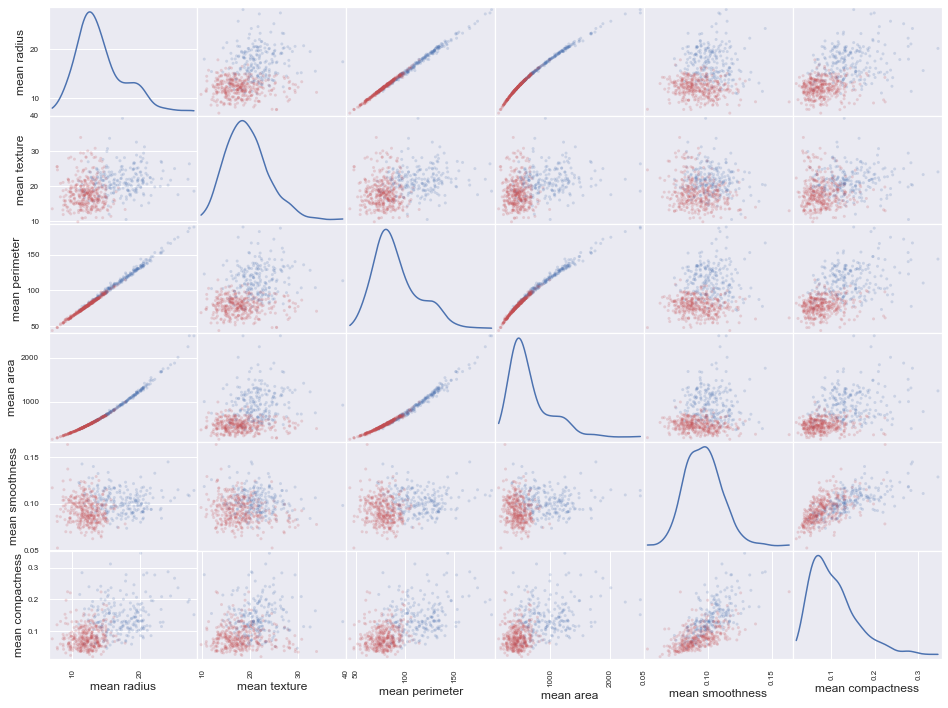

In [6]:
colors = list('r' if i==1 else 'b' for i in df_all['class'])
scatter_matrix(df_all[data.feature_names[:6]], alpha=0.2, figsize=(16,12), diagonal='kde',color=colors)
plt.show()

El problema claramente es separable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Caso Kernel Lineal y reguralización =100

Text(0.5, 1.0, 'Resultados de clasificación SVM')

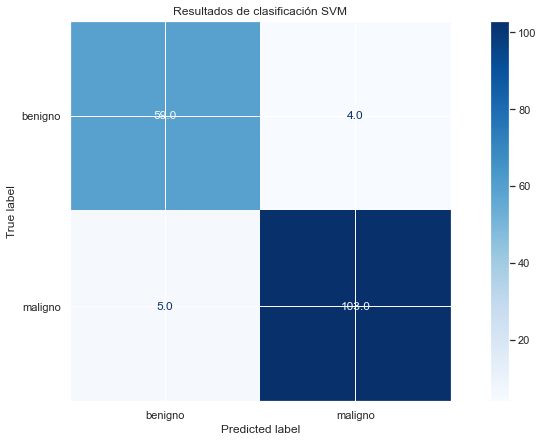

In [28]:
svm = SVC(kernel='linear', C=100).fit(X_train,y_train)
y_pred_test = svm.predict(X_test)
fig, ax = plt.subplots(figsize=(14, 7))
disp = plot_confusion_matrix(svm, X_test, y_test,display_labels=["benigno","maligno"], cmap=plt.cm.Blues,values_format= '.1f',ax=ax)
disp.ax_.set_title("Resultados de clasificación SVM")

Aqui notamos que en general el modelo clasifica bien, contamos con 6 errores dado que son maligno el modelo clasifico como benigno
este error es inaceptable como diagnostico, por otro lado contamos con 3 errores de predicción maligna cuando era benigna, este caso
es menos preocupante.

# Caso Kernel Gaussiano y regularización =100

Text(0.5, 1.0, 'Resultados de clasificación SVM con kernel Gaussinao')

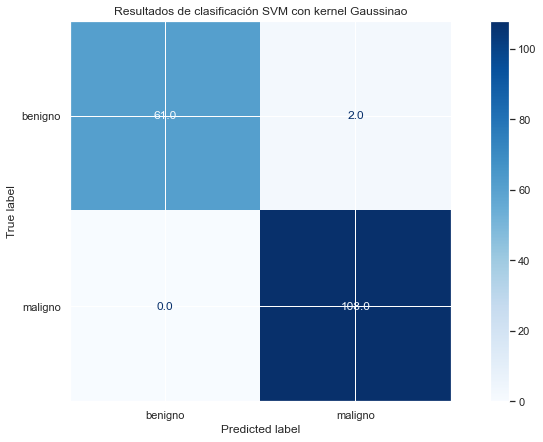

In [30]:
svm = SVC(kernel='rbf', C=100).fit(X_train,y_train)
y_pred_test = svm.predict(X_test)
fig, ax = plt.subplots(figsize=(14, 7))
disp = plot_confusion_matrix(svm, X_test, y_test,display_labels=["benigno","maligno"], cmap=plt.cm.Blues,values_format= '.1f',ax=ax)
disp.ax_.set_title("Resultados de clasificación SVM con kernel Gaussinao")

La opción del kernel ayuda mucho más.

Ahora, presentaremos un representación en dos dimensiones de nuestro problema, que tiene 32 dimensiones por lo que no podemos
como están siendo procesados los datos.

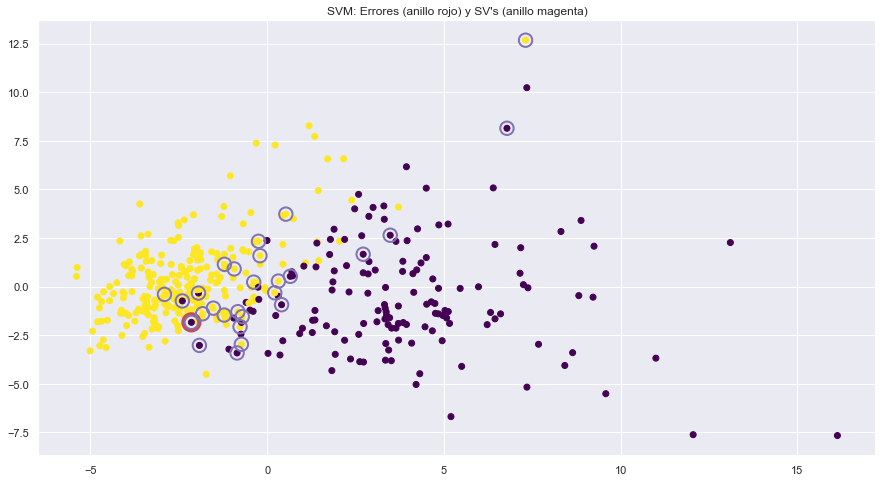

In [10]:

svm = SVC(kernel='linear', C=100)
svm.fit(X_train_scaled,y_train)
y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)


pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_proyected = pca.transform(X_train_scaled)
y_pred_train = svm.predict(X_train_scaled)
decision_train = svm.decision_function(X_train_scaled)

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(X_train_proyected[:,0],X_train_proyected[:,1],c=y_train+1,cmap= "viridis")

X_mistakes = X_train_scaled[y_train != y_pred_train]
if len(X_mistakes)>0:
  X_mistakes_proyected = pca.transform(X_mistakes)
  ax.scatter(X_mistakes_proyected[:,0],X_mistakes_proyected[:,1], s=280, facecolors='none',edgecolors='r',linewidth=3.5)
    
sv = svm.support_vectors_ #support vectors
nsv = svm.n_support_ #number of support vectors
sv_idx = svm.support_ #indices of support vectors
sv_proyected = pca.transform(sv)

ax.scatter(sv_proyected[:,0],sv_proyected[:,1], s=180, facecolors='none',edgecolors='m',linewidth=2)

plt.title("SVM: Errores (anillo rojo) y SV's (anillo magenta)")
plt.show()

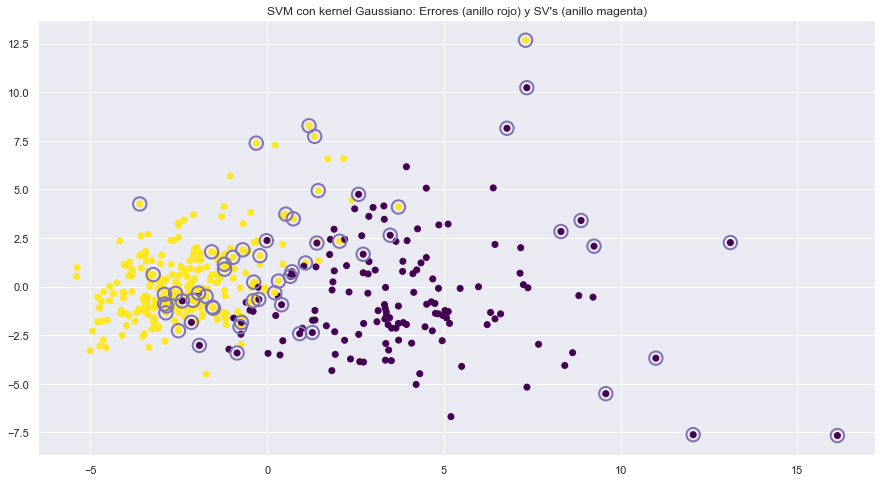

In [11]:

svm = SVC(kernel='rbf', C=100)
svm.fit(X_train_scaled,y_train)
y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)


pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_proyected = pca.transform(X_train_scaled)
y_pred_train = svm.predict(X_train_scaled)
decision_train = svm.decision_function(X_train_scaled)

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(X_train_proyected[:,0],X_train_proyected[:,1],c=y_train+1,cmap= "viridis")

X_mistakes = X_train_scaled[y_train != y_pred_train]
if len(X_mistakes)>0:
  X_mistakes_proyected = pca.transform(X_mistakes)
  ax.scatter(X_mistakes_proyected[:,0],X_mistakes_proyected[:,1], s=280, facecolors='none',edgecolors='r',linewidth=3.5)
sv = svm.support_vectors_ #support vectors
nsv = svm.n_support_ #number of support vectors
sv_idx = svm.support_ #indices of support vectors
sv_proyected = pca.transform(sv)

ax.scatter(sv_proyected[:,0],sv_proyected[:,1], s=180, facecolors='none',edgecolors='m',linewidth=2)

plt.title("SVM con kernel Gaussiano: Errores (anillo rojo) y SV's (anillo magenta)")
plt.show()


Aquí los support vectors cambiaron y no son interpretables en dos dimensiones.

In [13]:
sv.shape

(60, 30)

In [14]:
sv

array([[ 8.98800855e-01,  9.26832072e-01,  7.72648172e-01, ...,
        -4.93514666e-01, -6.92479242e-01, -1.05095812e+00],
       [ 1.38587565e+00,  1.34262986e+00,  1.48578570e+00, ...,
         2.12304160e+00,  2.87115861e+00,  1.15813641e+00],
       [ 2.65971471e-02,  8.05656717e-01,  6.23961679e-02, ...,
         3.50459907e-01, -2.97233565e-01, -1.56677445e-03],
       ...,
       [-2.93399668e-01,  3.75603006e-01, -2.58721830e-01, ...,
         6.67841451e-02, -5.14136681e-01, -1.02733587e-01],
       [-1.49749388e+00, -1.07374928e+00, -1.37954319e+00, ...,
        -1.03406588e+00, -1.01060381e+00,  1.42105581e+00],
       [-7.18174201e-01, -1.97009946e-01, -7.04329733e-01, ...,
         1.24773113e-01, -1.23711073e-01,  4.24819906e-01]])

# Tiempo de entrenamiento 

Fabricación de data en el código(Problema_Cuadratico)

In [31]:
from datetime import datetime

In [32]:
big_data= pd.read_csv("cancer_artificial_equilibrado.csv")
data = big_data.values
ix = [i for i in range(data.shape[1]) if i != big_data.shape[1]-1]
X, y = data[:, ix], data[:, big_data.shape[1]-1]

El mismo problema que demoró 13 minutos aquí duró 2.

In [33]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Inicio=", current_time)


svm = SVC(kernel='linear', C=100).fit(X,y)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Final=", current_time)


Inicio= 18:36:34
Final= 18:38:02


Visuluación de como agregamos la data

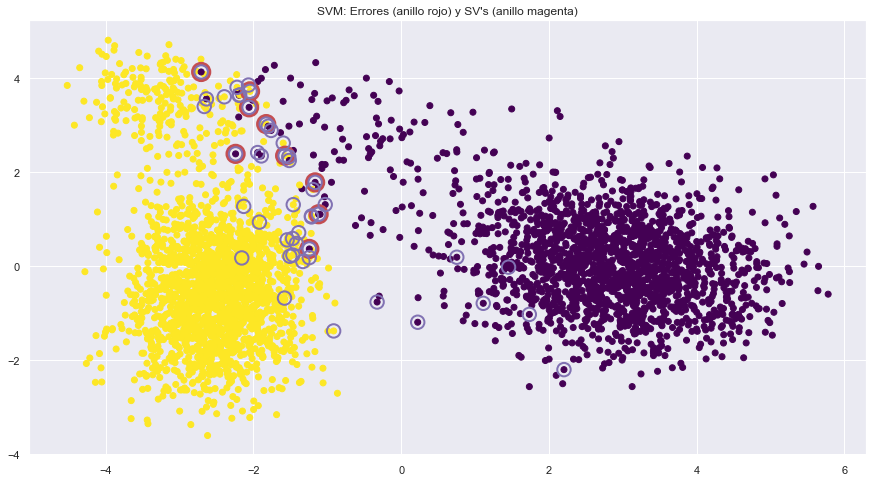

In [16]:

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm = SVC(kernel='linear', C=100)
svm.fit(X_train_scaled,y_train)
y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)


pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_proyected = pca.transform(X_train_scaled)
y_pred_train = svm.predict(X_train_scaled)
decision_train = svm.decision_function(X_train_scaled)

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(X_train_proyected[:,0],X_train_proyected[:,1],c=y_train+1,cmap= "viridis")

X_mistakes = X_train_scaled[y_train != y_pred_train]
if len(X_mistakes)>0:
  X_mistakes_proyected = pca.transform(X_mistakes)
  ax.scatter(X_mistakes_proyected[:,0],X_mistakes_proyected[:,1], s=280, facecolors='none',edgecolors='r',linewidth=3.5)
    
sv = svm.support_vectors_ #support vectors
nsv = svm.n_support_ #number of support vectors
sv_idx = svm.support_ #indices of support vectors
sv_proyected = pca.transform(sv)

ax.scatter(sv_proyected[:,0],sv_proyected[:,1], s=180, facecolors='none',edgecolors='m',linewidth=2)

plt.title("SVM: Errores (anillo rojo) y SV's (anillo magenta)")
plt.show()